<a href="https://colab.research.google.com/github/Gabriele90/ML-in-medical-imaging/blob/main/MRI_Brain_Tumor_prediction_using_VGG16_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Transfer learning for Brain Tumor MRI classification***

***Introduction***

Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.
Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. 



***Objectives***

In this study I propose a system performing detection and classification by using Deep Learning Algorithms using VGG16 model and TransferLearning (TL).

***Importing libraries***

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.utils import to_categorical
from keras import optimizers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

from tensorflow.keras.metrics import Metric
import cv2
import random
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator

***Importing dataset***

The dates contains MRI data. The images are already split into 4 categories: Glioma, Pituitary tumor, Meningioma, and no tumor.

In [83]:
#clone the dataset from the github repository
! git clone https://github.com/sartajbhuvaji/brain-tumor-classification-dataset

fatal: destination path 'brain-tumor-classification-dataset' already exists and is not an empty directory.


In [84]:

#set the path to the main dir
import os
main_dir = "/content/brain-tumor-classification-dataset"
#set the path to the train dir
train_dir = os.path.join(main_dir,'Training')
#set the path to the test dir
test_dir = os.path.join(main_dir,'Testing')
#directory with the training glioma images
train_glioma_dir = os.path.join(train_dir, 'glioma_tumor')
#directory with the training meningioma images
train_meningioma_dir = os.path.join(train_dir, 'meningioma_tumor')
#directory with the training pituitary images
train_pituitary_dir = os.path.join(train_dir, 'pituitary_tumor')
#directory with the training no_tumor images
train_no_tumor_dir = os.path.join(train_dir, 'no_tumor')
#directory with the testing covid images
test_glioma_dir = os.path.join(test_dir, 'glioma_tumor')
#directory with the testing meningioma images
test_meningioma_dir = os.path.join(test_dir, 'meningioma_tumor')
#directory with the testing pituitary images
test_pituitary_dir = os.path.join(test_dir, 'pituitary_tumor')
#directory with the training no_tumor images
test_no_tumor_dir = os.path.join(test_dir, 'no_tumor')

In [85]:
train_meningioma_names = os.listdir(train_meningioma_dir)
print(train_meningioma_names[:5])

train_glioma_names = os.listdir(train_glioma_dir)
print(train_glioma_names[:5])

train_pituitary_names = os.listdir(train_pituitary_dir)
print(train_meningioma_names[:5])

train_no_tumor_names = os.listdir(train_no_tumor_dir)
print(train_no_tumor_names[:5])

test_meningioma_names = os.listdir(test_meningioma_dir)
print(test_meningioma_names[:5])

test_glioma_names = os.listdir(test_glioma_dir)
print(test_glioma_names[:5])

test_pituitary_names = os.listdir(test_pituitary_dir)
print(test_meningioma_names[:5])

test_no_tumor_names = os.listdir(test_no_tumor_dir)
print(test_no_tumor_names[:5])

['m1(121).jpg', 'm (141).jpg', 'm1(183).jpg', 'm2 (35).jpg', 'm (45).jpg']
['gg (460).jpg', 'gg (784).jpg', 'gg (704).jpg', 'gg (227).jpg', 'gg (498).jpg']
['m1(121).jpg', 'm (141).jpg', 'm1(183).jpg', 'm2 (35).jpg', 'm (45).jpg']
['image (55).jpg', 'image(239).jpg', 'image (61).jpg', 'image(28).jpg', 'image(205).jpg']
['image(28).jpg', 'image(59).jpg', 'image(75).jpg', 'image(31).jpg', 'image(42).jpg']
['image(28).jpg', 'image(59).jpg', 'image(75).jpg', 'image(31).jpg', 'image(42).jpg']
['image(28).jpg', 'image(59).jpg', 'image(75).jpg', 'image(31).jpg', 'image(42).jpg']
['image(28).jpg', 'image(59).jpg', 'image(75).jpg', 'image(31).jpg', 'image(42).jpg']


In [86]:
#print the total no of images present in each dir
print("Total images in the training set:", len(train_glioma_names+train_meningioma_names+train_no_tumor_names+train_pituitary_names))
print("Total images in the test set:", len(test_glioma_names+test_meningioma_names+train_no_tumor_names+train_pituitary_names))

Total images in the training set: 2870
Total images in the test set: 1437


***Visualizing data***

In [87]:
#get the filenames from the covid & normal dir of the train dataset
glioma_pic =[os.path.join(train_glioma_dir, filename) for filename in train_glioma_names[0:4]]
pituitary_pic =[os.path.join(train_pituitary_dir, filename) for filename in train_pituitary_names[0:4]]
meningioma_pic =[os.path.join(train_meningioma_dir, filename) for filename in train_meningioma_names[0:4]]
no_tumor_pic =[os.path.join(train_no_tumor_dir, filename) for filename in train_no_tumor_names[0:4]]

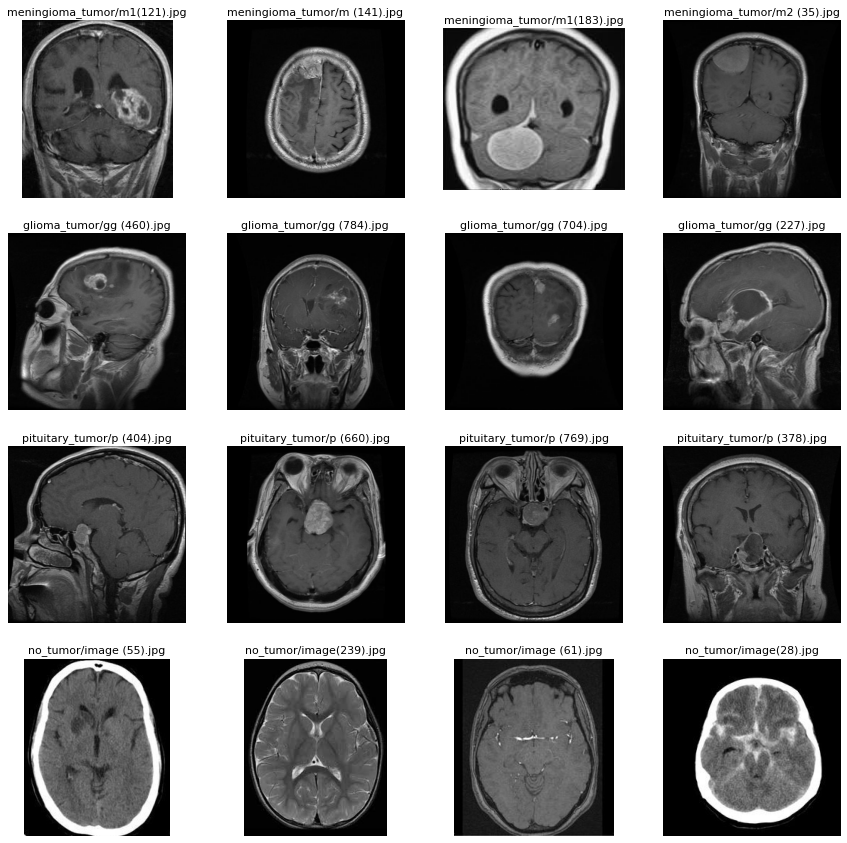

In [88]:
import matplotlib.pyplot as plt
# plot a grid of 16 images (2 images of each class)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(15,15)
#merge the covid and normal list
merged_list = meningioma_pic+glioma_pic+pituitary_pic+no_tumor_pic
for i , img_path in enumerate(merged_list):
  data= img_path.split('/', 4)[4]
  sp = plt.subplot(rows, cols, i + 1 )
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=11)
  plt.imshow(img,cmap='gray')

  plt.show

***Image Cropping***

The MRIs contain a black background around the central image of the brain. This black background provides no useful information about the tumor and would be waste if fed to neural networks. Hence cropping the images around the main contour would be useful. For this we use cv2.findContours() from the ‘cv2’ library.

In [89]:
x = []
y = []

for i in tqdm(os.listdir(train_meningioma_dir)):
    path = os.path.join(train_meningioma_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Meningioma')

for i in tqdm(os.listdir(train_glioma_dir)):
    path = os.path.join(train_glioma_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Glioma')

for i in tqdm(os.listdir(train_pituitary_dir)):
    path = os.path.join(train_pituitary_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Pituitary')   

for i in tqdm(os.listdir(train_no_tumor_dir)):
    path = os.path.join(train_no_tumor_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('No tumor')

100%|██████████| 395/395 [00:00<00:00, 420.05it/s]


In [90]:
for i in tqdm(os.listdir(test_meningioma_dir)):
    path = os.path.join(test_meningioma_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Meningioma')

for i in tqdm(os.listdir(test_glioma_dir)):
    path = os.path.join(test_glioma_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Glioma')

for i in tqdm(os.listdir(test_pituitary_dir)):
    path = os.path.join(test_pituitary_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Pituitary')   

for i in tqdm(os.listdir(test_no_tumor_dir)):
    path = os.path.join(test_no_tumor_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('No tumor')

100%|██████████| 105/105 [00:00<00:00, 865.62it/s]


In [91]:
x = np.array(x)
y = np.array(y)
x.shape,y.shape

((3264, 224, 224, 3), (3264,))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


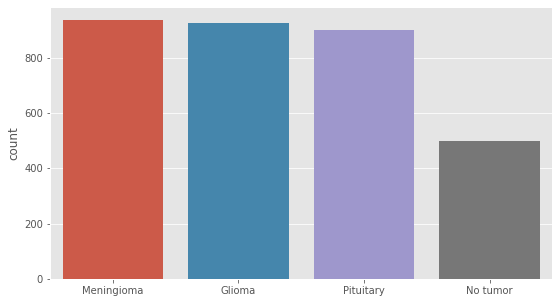

In [92]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y)
plt.show()

***Hotlabel encoding***

In [93]:
y

array(['Meningioma', 'Meningioma', 'Meningioma', ..., 'No tumor',
       'No tumor', 'No tumor'], dtype='<U10')

In [94]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [95]:
y = to_categorical(y)#num_classes = 4
y.shape

(3264, 4)

In [96]:
from sklearn.utils import shuffle
x,y = shuffle(x,y)

***Data splitting***

When developing a deep learning-based method, using a rigorous evaluation process is essential to avoid overfitting to training data or the generation of fake information. In order to evaluate the performance of the network, it is generally recommended to split data into training, valid, and test sets. The training set data are used to determine the network parameters. In most cases, the network shows good performance for the training set after an iterative learning process with the proper adjustment
of the network structure and its hyperparameters, due to
its very high capacity. Therefore, the separate validation
set is required to predict the general performance of the
network. The data in the validation set should not be fed
into the network because the model should have the ability
to apply external data not included in the training process.

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
y_test.shape

(653, 4)

***Data Augmentation***

The amount of data gathered was very low and could cause the models to under-fit. Hence, we would use a brilliant technique of Data Augmentation to increase the amount of data. This technique relies on rotations, flips, change in exposure, etc to create similar images. Using this technique we can increase the size of data by a high factor. The output image of the cropping stage is given as input to ImageDataGenerator which is a function in keras.preprocessing.image library. This function takes multiple arguments that decide how Augmentation takes place.

In [98]:
img_size=224
train_datagen = ImageDataGenerator(rotation_range=30,height_shift_range=0.2,
                                  zoom_range = 0.3,horizontal_flip=True)#rescale=(1./255),
test_datagen = ImageDataGenerator()#rescale=(1./255)

train_gen = train_datagen.flow_from_directory(directory = train_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)
test_gen = test_datagen.flow_from_directory(directory = test_dir,target_size=(img_size,img_size),class_mode ="categorical",
                                              batch_size=32)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


***Showing the generated data***

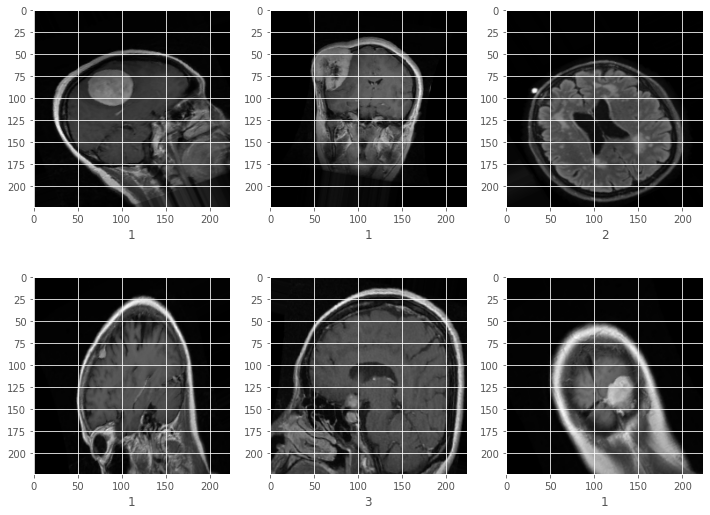

In [99]:
from tensorflow.keras.preprocessing import image
sample_x,sample_y = next(train_gen)
plt.figure(figsize=(12,9))
for i in range(6):
    plt.subplot(2,3,i+1)
    sample = image.array_to_img(sample_x[i])
    plt.xlabel(np.argmax(sample_y[i]))
    plt.imshow(sample)
plt.show()

In [100]:
#get the class indices
train_gen.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [101]:
#get the image shape
train_gen.image_shape

(224, 224, 3)

In [102]:
#get the class indices
train_gen.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [103]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization,LayerNormalization

In [104]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint( "VGG16" ,monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'auto', verbose = 1)

***VGG16 Model***

The VGG-16 which has 13 convolutional and 3 fully-connected layers, carrying with them the ReLU tradition from AlexNet. This network stacks more layers onto AlexNet, and use smaller size filters (2×2 and 3×3). It consists of 138M parameters and takes up about 500MB of storage space.

In [105]:
model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=(224,224,3)))
model.add(layers.Conv2D(64, 3, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, 3, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, strides=2))
model.add(layers.Conv2D(128, 3, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, 3, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, strides=2))
model.add(layers.Conv2D(256, 3, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 1, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, strides=2))
model.add(layers.Conv2D(512, 3, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, 3, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, 1, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, strides=2))
model.add(layers.Conv2D(512, 3, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, 3, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, 1, strides=1, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(2, strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_1 (Resizing)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
activation_112 (Activation)  (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
activation_113 (Activation)  (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 112, 112, 128)    

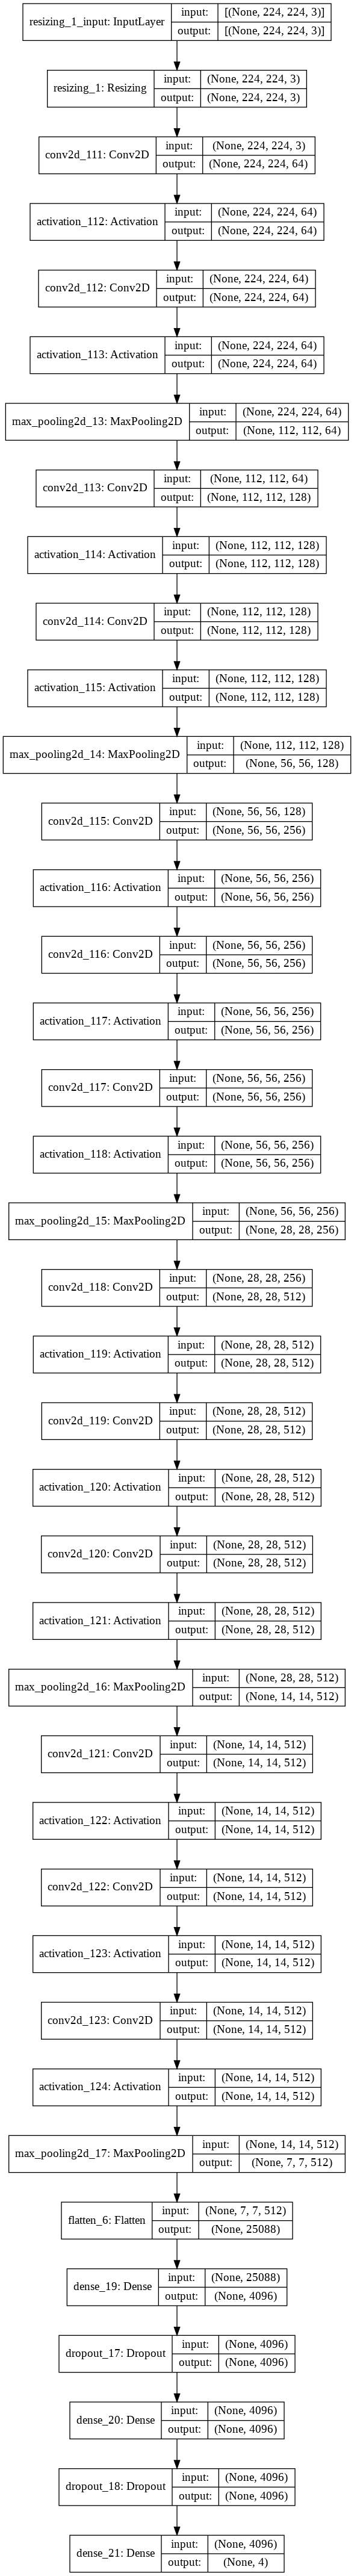

In [106]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'VGG16 model.png', show_shapes=True)

In [107]:
model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

In [108]:
#train the VGG16 model

history = model.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])

Epoch 1/15
82/82 [==============================] - 36s 429ms/step - loss: 1.4278 - accuracy: 0.3441 - val_loss: 1.0943 - val_accuracy: 0.4977

Epoch 00001: val_accuracy improved from -inf to 0.49770, saving model to VGG16
INFO:tensorflow:Assets written to: VGG16/assets
Epoch 2/15
82/82 [==============================] - 34s 417ms/step - loss: 1.0434 - accuracy: 0.5405 - val_loss: 0.9640 - val_accuracy: 0.5850

Epoch 00002: val_accuracy improved from 0.49770 to 0.58499, saving model to VGG16
INFO:tensorflow:Assets written to: VGG16/assets
Epoch 3/15
82/82 [==============================] - 35s 423ms/step - loss: 0.8257 - accuracy: 0.6297 - val_loss: 0.7746 - val_accuracy: 0.7243

Epoch 00003: val_accuracy improved from 0.58499 to 0.72435, saving model to VGG16
INFO:tensorflow:Assets written to: VGG16/assets
Epoch 4/15
82/82 [==============================] - 34s 420ms/step - loss: 0.7982 - accuracy: 0.6594 - val_loss: 0.6195 - val_accuracy: 0.7412

Epoch 00004: val_accuracy improved fr

In [109]:
train_loss,train_acc = model.evaluate(train_gen)
print('VGG16 model train loss :{} train acc:{}'.format(train_loss,train_acc))

90/90 [==============================] - 39s 430ms/step - loss: 3.8372 - accuracy: 0.4624
VGG16 model train loss :3.837153911590576 train acc:0.4623693525791168


In [110]:
test_loss,test_acc = model.evaluate(test_gen)
print('VGG16 model test loss :{} test acc:{}'.format(test_loss,test_acc))

13/13 [==============================] - 2s 125ms/step - loss: 0.1772 - accuracy: 0.9721
VGG16 model test loss :0.1771768033504486 test acc:0.9720812439918518


***Transfer Learning*** 

It is a machine learning method where we apply a pre-trained model as a starting point for developing another model for a similar task.
The form of transfer learning used in deep learning is an inductive transfer, that refers to the ability of a learning mechanism to improve performance on the current task after having learned a different but related concept or skill on a previous task.

In [111]:
from tensorflow.keras import datasets, layers, models, losses, Model

***Fine tuning***

In this approach of transfer learning, the whole model is trained on the available target dataset, and weights are fine-tuned using backpropagation. To reduce the computational cost, it’s also possible to keep some of the earlier layers fixed (due to overfitting concerns) and only fine-tune some higher-level portions of the network. In this case, we utilize the knowledge in terms of the overall architecture of the network and use its states as the starting point for our retraining step. This, in turn, helps us achieve better performance with less training time.

In [112]:
base_model = tf.keras.applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in base_model.layers:
  layer.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [125]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(4, activation = 'softmax')(x)
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics = ["accuracy"])

In [114]:
head_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

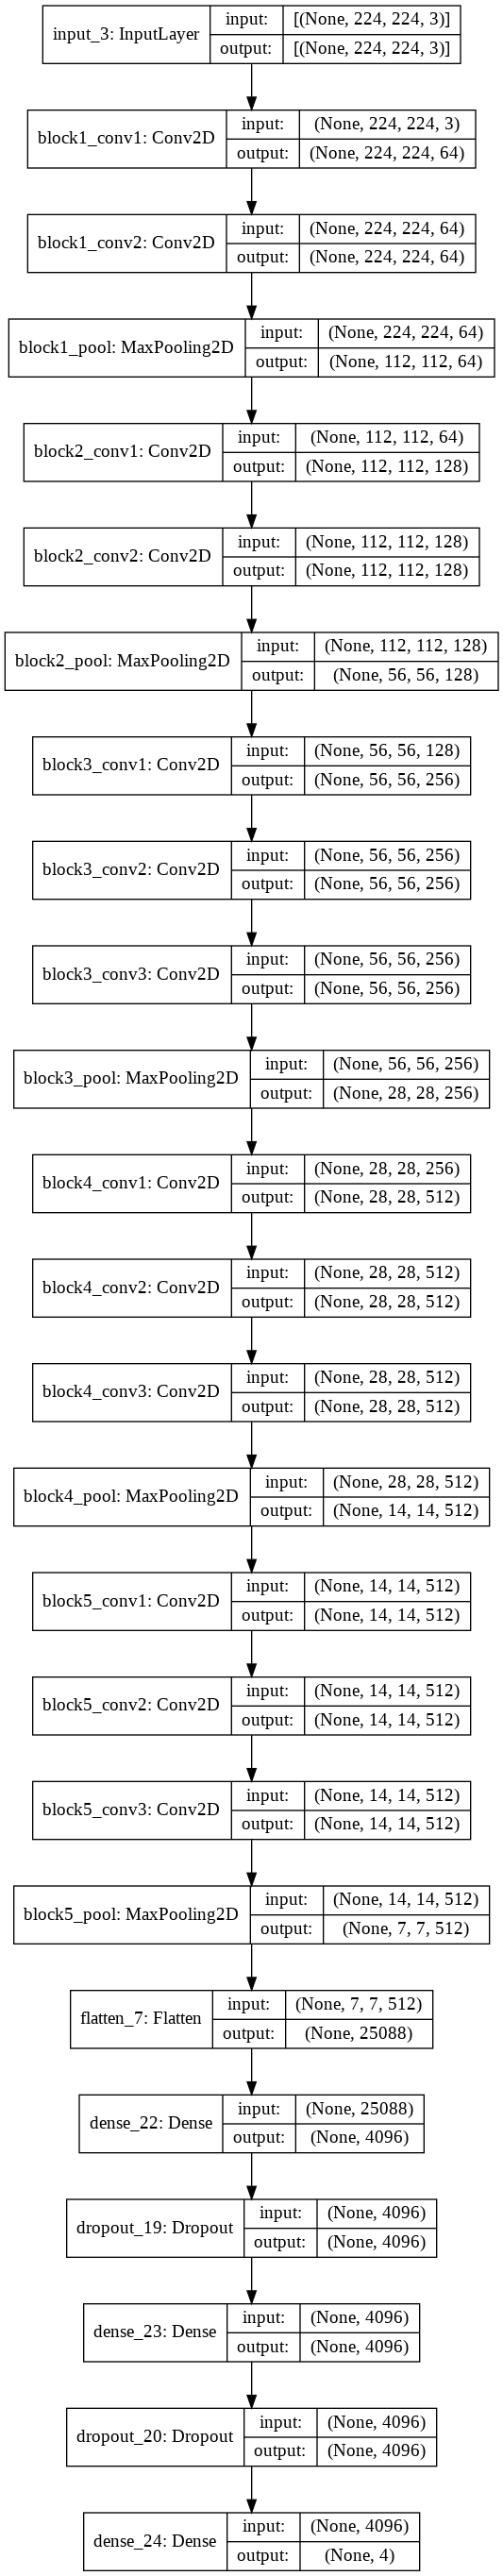

In [115]:
from tensorflow.keras.utils import plot_model
plot_model(head_model, 'VGG16 model.png', show_shapes=True)

In [116]:
#train the transfer learning VGG16 model
history_2=head_model.fit(x_train,y_train,epochs=15,validation_data = (x_test,y_test),verbose=1,
                              callbacks=[checkpoint,earlystop,reduce_lr])

Epoch 1/15
82/82 [==============================] - 16s 186ms/step - loss: 10.3508 - accuracy: 0.5751 - val_loss: 4.8647 - val_accuracy: 0.7672

Epoch 00001: val_accuracy did not improve from 0.94028
Epoch 2/15
82/82 [==============================] - 15s 187ms/step - loss: 4.1048 - accuracy: 0.8146 - val_loss: 2.7895 - val_accuracy: 0.8668

Epoch 00002: val_accuracy did not improve from 0.94028
Epoch 3/15
82/82 [==============================] - 15s 178ms/step - loss: 2.4830 - accuracy: 0.8794 - val_loss: 1.9381 - val_accuracy: 0.8974

Epoch 00003: val_accuracy did not improve from 0.94028
Epoch 4/15
82/82 [==============================] - 14s 174ms/step - loss: 2.0823 - accuracy: 0.8915 - val_loss: 3.1322 - val_accuracy: 0.8698

Epoch 00004: val_accuracy did not improve from 0.94028
Epoch 5/15
82/82 [==============================] - 14s 174ms/step - loss: 1.3085 - accuracy: 0.9222 - val_loss: 1.1259 - val_accuracy: 0.9112

Epoch 00005: val_accuracy did not improve from 0.94028
Epoc

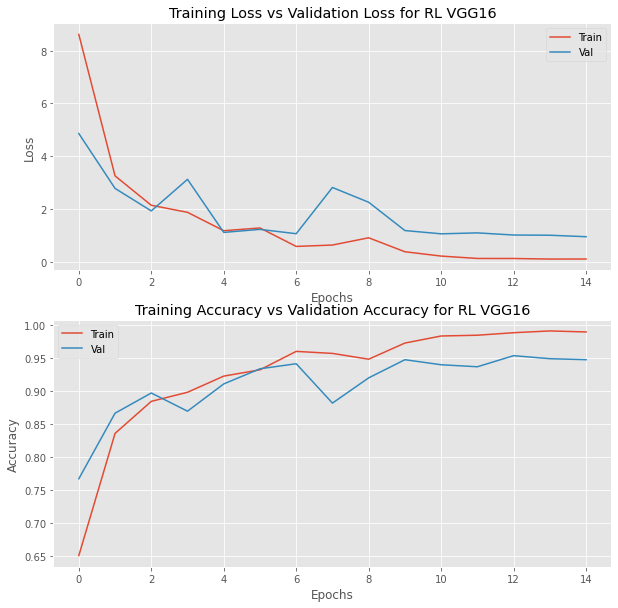

In [117]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
axs[0].plot(history_2.history['loss'])
axs[0].plot(history_2.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss for TL VGG16')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history_2.history['accuracy'])
axs[1].plot(history_2.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy for TL VGG16')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [118]:
train_loss_2,train_acc_2 = head_model.evaluate(train_gen)
print('TL VGG16 model train loss :{} train acc:{}'.format(train_loss_2,train_acc_2))

90/90 [==============================] - 40s 442ms/step - loss: 6.6242 - accuracy: 0.6927
RL VGG16 model train loss :6.624246597290039 train acc:0.6926829218864441


In [119]:
test_loss_2,test_acc_2 = head_model.evaluate(test_gen)
print('TL VGG16 model test loss :{} test acc:{}'.format(test_loss_2,test_acc_2))

13/13 [==============================] - 2s 144ms/step - loss: 0.7150 - accuracy: 0.9695
RL VGG16 model test loss :0.7150322198867798 test acc:0.9695431590080261


***Classification Report***

We evaluate Pecision, Recall, F1score, and Support for the five models.

In [120]:
y_pred= head_model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)
y_test_new = np.argmax(y_test,axis=1)

[0 1 2 3] [180 188  93 192]


In [121]:
from sklearn.metrics import classification_report,confusion_matrix

In [122]:
clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       187
           1       0.91      0.93      0.92       184
           2       0.97      0.95      0.96        95
           3       0.97      1.00      0.99       187

    accuracy                           0.95       653
   macro avg       0.95      0.95      0.95       653
weighted avg       0.95      0.95      0.95       653



As we can see, we achieved a powerful grade of accuracy of 95%.

***Confusion Matrix***

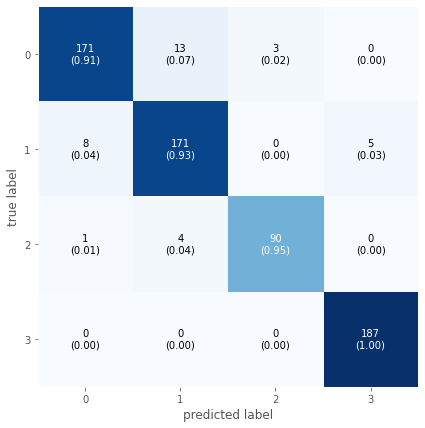

In [123]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test_new,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),
                     show_normed=True);

***Model Performance***

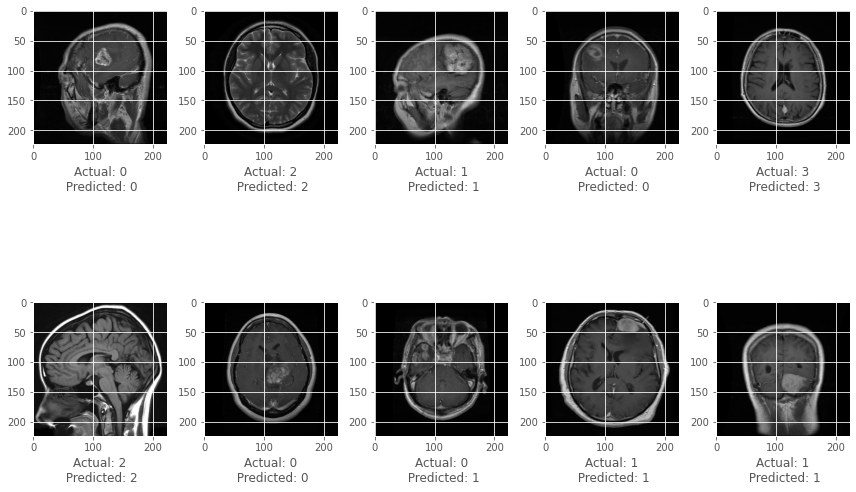

In [124]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[sample_idx])
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()

As we can see the model performs quite perfectly, except for Meningioma (90% of accuracy).